**import libraries**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as nr

**Run gc_simulate.py**

In [40]:
n_states = 2 # normal (background) and abnormal (foreground) GC-content 
seq_len = 100000 # short sequence for fast results (with reasonable programming ;)

prob_backg_vec = np.array([0.29, 0.21, 0.21, 0.29]) # "background" low/medium-GC genomic ("normal") content   
prob_foreg_vec = np.array([0.16, 0.34, 0.34, 0.16]) # "foreground" high-GC ("island") content 
emiss_prob_mat = np.array((prob_backg_vec, prob_foreg_vec))
trans_prob_mat = np.array(([0.999, 0.001], [0.005, 0.995]))


i_state = 0 # 0: background, 1: foreground - you could choose it randomly, but let's start with some "normal" content :)
bg_alphabet_vec = np.array(list('acgt'))
fg_alphabet_vec = np.array(list('ACGT'))
alphabet_mat = np.array((bg_alphabet_vec,fg_alphabet_vec))

np.random.seed(42) # do not change this!

#%%
seq_labeled = ''
seq_unlabeled = ''

# not the most efficient way, but just for generation of one sequence this should be ok ;)
state_vec = np.zeros(seq_len)
for i_seq in range(seq_len):
    state_vec[i_seq] = i_state
    i_alph = np.argmax(nr.multinomial(1, emiss_prob_mat[i_state]))
    seq_labeled += str(alphabet_mat[i_state][i_alph][0]) 
    seq_unlabeled += str(fg_alphabet_vec[i_alph][0]) 
    i_state = np.argmax(nr.multinomial(1, trans_prob_mat[i_state]))
     
# print(seq_labeled) # ground truth for performance analysis                      
# print(seq_unlabeled) # input to HMM-based state prediction

seq_vec = np.array(list(seq_unlabeled)) # sequence to be analyzed
gc_content = np.mean(seq_vec == 'C') + np.mean(seq_vec == 'G') # overall GC-content


In [41]:
seq_labeled[ :200]

'ctagtttatgatgtcactctcgattcaccttactaacatatgtattagcatagtttactagatttgcatcaatgaacaacgggtaagctttttgactatcctcttttggctaattaagagacaccaacctgataggagcagctgccaaaactcctgatgagtagataACGGGTCTGGACCCTCGCCGGGCCATGGTGGGC'

In [42]:
seq_unlabeled[ :200]

'CTAGTTTATGATGTCACTCTCGATTCACCTTACTAACATATGTATTAGCATAGTTTACTAGATTTGCATCAATGAACAACGGGTAAGCTTTTTGACTATCCTCTTTTGGCTAATTAAGAGACACCAACCTGATAGGAGCAGCTGCCAAAACTCCTGATGAGTAGATAACGGGTCTGGACCCTCGCCGGGCCATGGTGGGC'

In [43]:
state_vec [ :200]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
print("Overall GC Content:", gc_content)

Overall GC Content: 0.47465


#### Analyse foreground and background region

In [45]:
# Function to analyze region lengths
def analyze_regions(seq_labeled):
    """
    Analyzes the lengths of consecutive background and foreground regions.

    Parameters:
    seq_labeled (str): Labeled sequence with background (lowercase) and foreground (uppercase) letters.

    Returns:
    lengths_background (list): Lengths of background regions.
    lengths_foreground (list): Lengths of foreground regions.
    """
    lengths_background = []
    lengths_foreground = []
    current_length = 1
    is_foreground = seq_labeled[0].isupper()
    
    for i in range(1, len(seq_labeled)):
        if seq_labeled[i].isupper() == is_foreground:
            current_length += 1
        else:
            if is_foreground:
                lengths_foreground.append(current_length)
            else:
                lengths_background.append(current_length)
            current_length = 1
            is_foreground = seq_labeled[i].isupper()
    
    # Append the last region
    if is_foreground:
        lengths_foreground.append(current_length)
    else:
        lengths_background.append(current_length)
    
    return lengths_background, lengths_foreground

# Analyze the labeled sequence
lengths_background, lengths_foreground = analyze_regions(seq_labeled)


#### Plot Histograms of Region Lengths

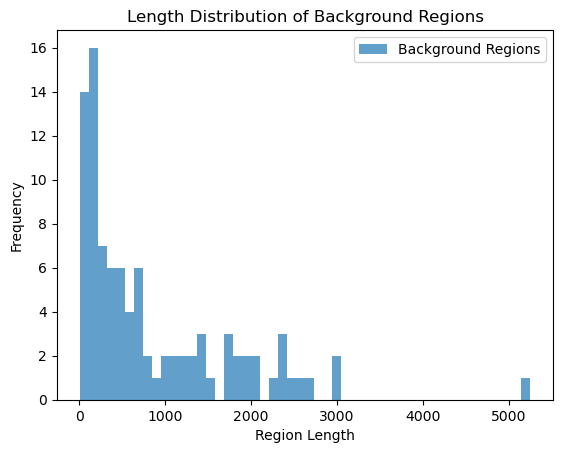

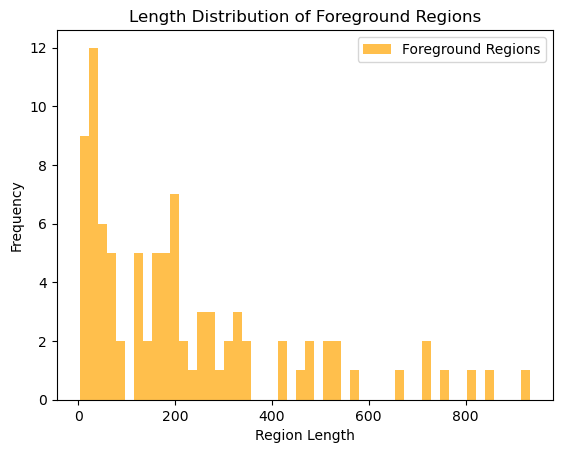

In [46]:
plt.hist(lengths_background, bins=50, alpha=0.7, label="Background Regions")
plt.xlabel("Region Length")
plt.ylabel("Frequency")
plt.title("Length Distribution of Background Regions")
plt.legend()
plt.show()

plt.hist(lengths_foreground, bins=50, alpha=0.7, label="Foreground Regions", color='orange')
plt.xlabel("Region Length")
plt.ylabel("Frequency")
plt.title("Length Distribution of Foreground Regions")
plt.legend()
plt.show()

#### Average region length

In [47]:
# Calculate and print average lengths
avg_background = np.mean(lengths_background)
avg_foreground = np.mean(lengths_foreground)
print("Average Background Region Length:", avg_background)
print("Average Foreground Region Length:", avg_foreground)

# Transition probabilities and length adjustment
print("Transition Probabilities:")
print("Background to Foreground:", 1 / avg_background)
print("Foreground to Background:", 1 / avg_foreground)


Average Background Region Length: 854.5698924731183
Average Foreground Region Length: 223.09782608695653
Transition Probabilities:
Background to Foreground: 0.001170179301667191
Foreground to Background: 0.004482338611449452


### to increase foreground region length we have to decrease transition probability matrix

In [48]:
# Modified transition probability matrix to increase foreground length
# Lower probability of transitioning from foreground (state 1) to background (state 0)
trans_prob_mat = np.array([[0.999, 0.001], [0.002, 0.998]])

# Other parameters remain the same
prob_backg_vec = np.array([0.29, 0.21, 0.21, 0.29])  # Background emission probabilities
prob_foreg_vec = np.array([0.16, 0.34, 0.34, 0.16])  # Foreground emission probabilities
emiss_prob_mat = np.array((prob_backg_vec, prob_foreg_vec))

bg_alphabet_vec = np.array(list('acgt'))  # Background bases
fg_alphabet_vec = np.array(list('ACGT'))  # Foreground bases
alphabet_mat = np.array((bg_alphabet_vec, fg_alphabet_vec))

seq_len = 100000  # Sequence length
np.random.seed(42)  # Seed for reproducibility

# Initialize sequences
seq_labeled = ''
seq_unlabeled = ''
state_vec = np.zeros(seq_len)

# Generate the sequence with modified foreground length
i_state = 0  # Start in background state
for i_seq in range(seq_len):
    state_vec[i_seq] = i_state
    i_alph = np.argmax(nr.multinomial(1, emiss_prob_mat[i_state]))
    seq_labeled += str(alphabet_mat[i_state][i_alph][0]) 
    seq_unlabeled += str(fg_alphabet_vec[i_alph][0]) 
    i_state = np.argmax(nr.multinomial(1, trans_prob_mat[i_state]))

# Display overall GC content
seq_vec = np.array(list(seq_unlabeled))
gc_content = np.mean(seq_vec == 'C') + np.mean(seq_vec == 'G')
print("Overall GC Content:", gc_content)

Overall GC Content: 0.50857


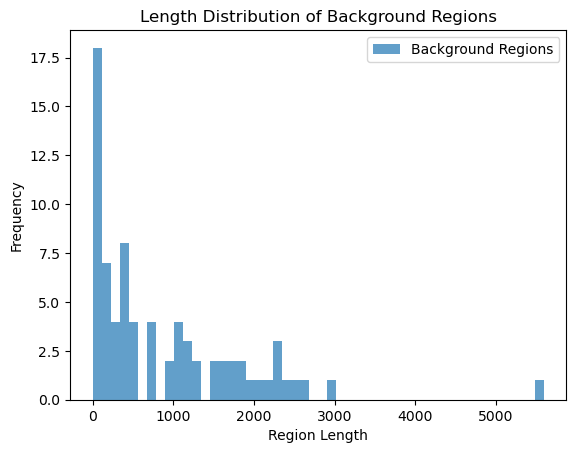

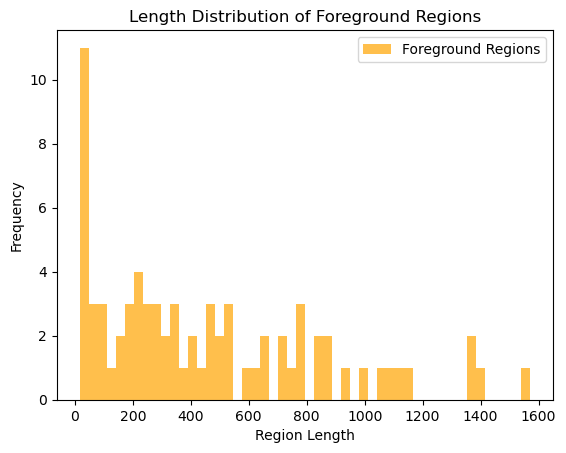

Average Background Region Length: 879.6266666666667
Average Foreground Region Length: 459.8378378378378


In [49]:
# Analyze region lengths
lengths_background, lengths_foreground = analyze_regions(seq_labeled)

# Plot histograms
plt.hist(lengths_background, bins=50, alpha=0.7, label="Background Regions")
plt.xlabel("Region Length")
plt.ylabel("Frequency")
plt.title("Length Distribution of Background Regions")
plt.legend()
plt.show()

plt.hist(lengths_foreground, bins=50, alpha=0.7, label="Foreground Regions", color='orange')
plt.xlabel("Region Length")
plt.ylabel("Frequency")
plt.title("Length Distribution of Foreground Regions")
plt.legend()
plt.show()

# Print average region lengths
avg_background = np.mean(lengths_background)
avg_foreground = np.mean(lengths_foreground)
print("Average Background Region Length:", avg_background)
print("Average Foreground Region Length:", avg_foreground)


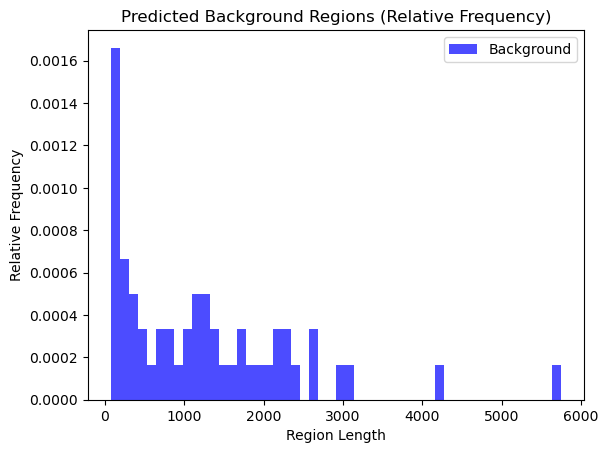

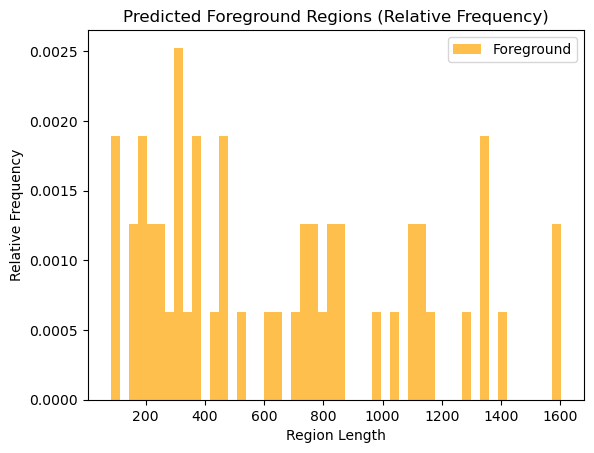

Positive Predictive Value (PPV): 0.970
Sensitivity: 0.973052
Steady-State Probabilities: [0.83333333 0.16666667]
True States (First 1000): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [50]:
# Step 1: Define the HMM parameters
# Transition probabilities
trans_prob_mat = np.array([[0.999, 0.001], [0.005, 0.995]])
log_trans_prob_mat = np.log(trans_prob_mat)  # Use log probabilities for stability

# Emission probabilities
prob_backg_vec = np.array([0.29, 0.21, 0.21, 0.29])
prob_foreg_vec = np.array([0.16, 0.34, 0.34, 0.16])
emiss_prob_mat = np.array((prob_backg_vec, prob_foreg_vec))

# Initial state probabilities (equal for both states)
log_init_prob = np.log(np.array([0.5, 0.5]))

# Convert sequence characters to indices for emission probabilities
def seq_to_indices(seq):
    mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    return np.array([mapping[base] for base in seq])

# Step 2: Implement the Viterbi Algorithm in log-space
def viterbi(sequence, trans_prob_mat, emiss_prob_mat, log_init_prob):
    """
    Implements the Viterbi algorithm for a given sequence.

    Parameters:
    sequence (str): Observation sequence (DNA sequence).
    trans_prob_mat (numpy.ndarray): Transition probabilities.
    emiss_prob_mat (numpy.ndarray): Emission probabilities.
    log_init_prob (numpy.ndarray): Logarithm of initial state probabilities.

    Returns:
    list: Most probable state sequence.
    """
    seq_len = len(sequence)
    n_states = trans_prob_mat.shape[0]

    # Convert sequence to emission indices
    seq_indices = seq_to_indices(sequence)

    # Initialize matrices for log probabilities and backpointers
    log_probs = np.full((n_states, seq_len), -np.inf)  # Log probabilities
    backpointers = np.zeros((n_states, seq_len), dtype=int)

    # Initialize the first column
    log_probs[:, 0] = log_init_prob + np.log(emiss_prob_mat[:, seq_indices[0]])

    # Fill in the rest of the matrix
    for t in range(1, seq_len):
        for s in range(n_states):
            transition_probs = log_probs[:, t - 1] + log_trans_prob_mat[:, s]
            best_prev_state = np.argmax(transition_probs)
            log_probs[s, t] = transition_probs[best_prev_state] + np.log(emiss_prob_mat[s, seq_indices[t]])
            backpointers[s, t] = best_prev_state

    # Backtrack to find the most probable state sequence
    best_path = np.zeros(seq_len, dtype=int)
    best_path[-1] = np.argmax(log_probs[:, -1])  # Start from the last column
    for t in range(seq_len - 2, -1, -1):
        best_path[t] = backpointers[best_path[t + 1], t + 1]

    return best_path

# Step 3: Run Viterbi on the unlabeled sequence
predicted_states = viterbi(seq_unlabeled, trans_prob_mat, emiss_prob_mat, log_init_prob)

# Step 4: Analyze Predicted Regions
def analyze_predicted_regions(predicted_states):
    lengths_background = []
    lengths_foreground = []
    current_length = 1
    is_foreground = predicted_states[0] == 1

    for i in range(1, len(predicted_states)):
        if predicted_states[i] == (1 if is_foreground else 0):
            current_length += 1
        else:
            if is_foreground:
                lengths_foreground.append(current_length)
            else:
                lengths_background.append(current_length)
            current_length = 1
            is_foreground = not is_foreground

    # Append the last region
    if is_foreground:
        lengths_foreground.append(current_length)
    else:
        lengths_background.append(current_length)

    return lengths_background, lengths_foreground

# Get predicted region lengths
pred_lengths_background, pred_lengths_foreground = analyze_predicted_regions(predicted_states)

# Step 5: Plot Relative Frequency Histograms
def plot_histogram(lengths, title, color, label):
    plt.hist(lengths, bins=50, alpha=0.7, density=True, label=label, color=color)
    plt.xlabel("Region Length")
    plt.ylabel("Relative Frequency")
    plt.title(title)
    plt.legend()
    plt.show()

plot_histogram(pred_lengths_background, "Predicted Background Regions (Relative Frequency)", "blue", "Background")
plot_histogram(pred_lengths_foreground, "Predicted Foreground Regions (Relative Frequency)", "orange", "Foreground")

# Step 6: Evaluate Prediction Accuracy with PPV
def calculate_metrics(true_states, predicted_states):
    tp = np.sum((true_states == 1) & (predicted_states == 1))
    fp = np.sum((true_states == 0) & (predicted_states == 1))
    fn = np.sum((true_states == 1) & (predicted_states == 0))
    # Calculate Positive Predictive Value (PPV) and Sensitivity
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # Avoid division by zero
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    return ppv, sensitivity

ppv, sensitivity = calculate_metrics(state_vec, predicted_states)
print(f"Positive Predictive Value (PPV): {ppv:.3f}")
print(f"Sensitivity: {sensitivity:3f}")

# Step 7: Eigenvector Normalization for Steady-State Probabilities
eig_val, eig_vec = np.linalg.eig(trans_prob_mat.T)
steady_state_vec = eig_vec[:, 0].real
steady_state_vec /= steady_state_vec.sum()  # Normalize
print("Steady-State Probabilities:", steady_state_vec)
# Step 8: Visual Comparison
print("True States (First 1000):", state_vec[:1000])
print("Predicted States (First 1000):", predicted_states[:1000])

#### The observable differences between the true and predicted states reveal typical errors such as false positives, false negatives, and boundary inaccuracies. These errors highlight the limitations of the path reconstruction using the Viterbi algorithm, primarily due to:

* Overlap in Emission Probabilities: Difficulty in distinguishing states when emissions are similar.
* Fixed Transition Probabilities: Inability to adapt to varying region lengths and state transition frequencies.
* Simplistic Model Assumptions: Lack of accommodation for biological complexity and variability.

#### Changing GC content to 60%

In [51]:
prob_foreg_vec = np.array([0.2, 0.3, 0.3, 0.2])  # GC-content = 60%

In [52]:
# Updated foreground probabilities
prob_backg_vec = np.array([0.29, 0.21, 0.21, 0.29])  # Background probabilities
prob_foreg_vec = np.array([0.2, 0.3, 0.3, 0.2])      # Foreground probabilities with 60% GC

emiss_prob_mat = np.array((prob_backg_vec, prob_foreg_vec))

# Generate new sequence
seq_labeled_new = ''
seq_unlabeled_new = ''
state_vec_new = np.zeros(seq_len)

i_state = 0
for i_seq in range(seq_len):
    state_vec_new[i_seq] = i_state
    i_alph = np.argmax(nr.multinomial(1, emiss_prob_mat[i_state]))
    seq_labeled_new += str(alphabet_mat[i_state][i_alph][0]) 
    seq_unlabeled_new += str(fg_alphabet_vec[i_alph][0]) 
    i_state = np.argmax(nr.multinomial(1, trans_prob_mat[i_state]))

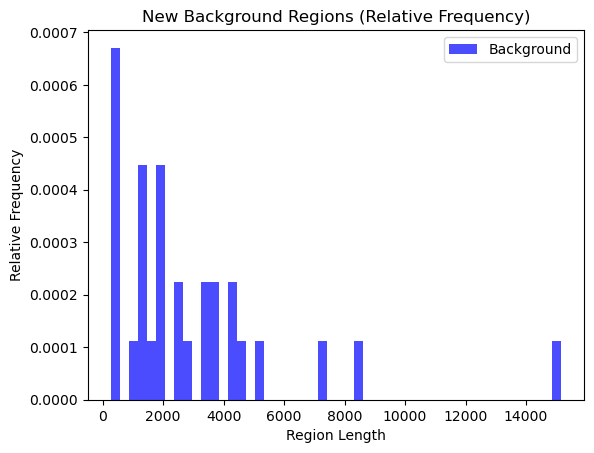

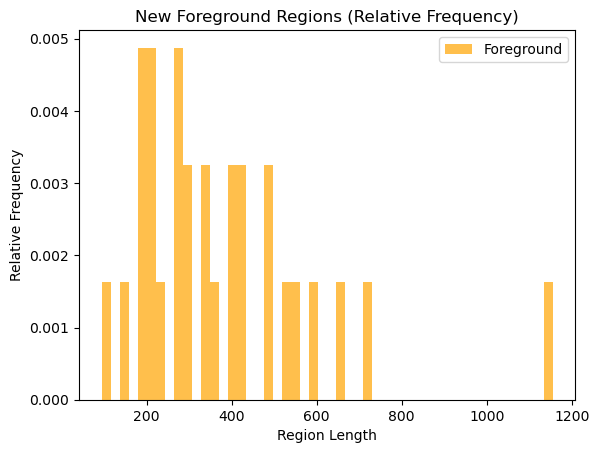

New Positive Predictive Value (PPV): 0.926
New Sensisitivity: 0.694
True States (First 1000, New): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 

In [54]:
# Run Viterbi on the new unlabeled sequence
predicted_states_new = viterbi(seq_unlabeled_new, trans_prob_mat, emiss_prob_mat, log_init_prob)

# Analyze predicted regions for the new sequence
pred_lengths_background_new, pred_lengths_foreground_new = analyze_predicted_regions(predicted_states_new)

# Plot histograms for the new sequence
plot_histogram(pred_lengths_background_new, "New Background Regions (Relative Frequency)", "blue", "Background")
plot_histogram(pred_lengths_foreground_new, "New Foreground Regions (Relative Frequency)", "orange", "Foreground")

# Evaluate prediction accuracy for the new sequence
ppv_new, sensisitivity_new = calculate_metrics(state_vec_new, predicted_states_new)
print(f"New Positive Predictive Value (PPV): {ppv_new:.3f}")
print(f"New Sensisitivity: {sensisitivity_new:.3f}")
# Visual comparison for the new sequence
print("True States (First 1000, New):", state_vec_new[:1000])
print("Predicted States (First 1000, New):", predicted_states_new[:1000])

* Higher GC-content in foreground regions does not always improve PPV; the overlap with background probabilities reduces the model's ability to differentiate the states.
* The unchanged transition probabilities exacerbate classification errors near region boundaries.
* To fully adapt the HMM to the new emission probabilities, both the emission and transition parameters should be jointly optimized.

#### D

In [17]:
# Estimate prior state probabilities from overall state frequencies
background_count = np.sum(state_vec == 0)
foreground_count = np.sum(state_vec == 1)

prior_prob_background = background_count / len(state_vec)
prior_prob_foreground = foreground_count / len(state_vec)

print(f"Estimated Prior Probabilities:")
print(f"Background: {prior_prob_background:.3f}")
print(f"Foreground: {prior_prob_foreground:.3f}")


Estimated Prior Probabilities:
Background: 0.660
Foreground: 0.340


In [18]:
# Compute steady-state probabilities from the transition matrix
eig_val, eig_vec = np.linalg.eig(trans_prob_mat.T)
steady_state_vec = eig_vec[:, 0].real
steady_state_vec /= steady_state_vec.sum()  # Normalize to sum to 1

steady_prob_background, steady_prob_foreground = steady_state_vec

print(f"Steady-State Probabilities:")
print(f"Background: {steady_prob_background:.3f}")
print(f"Foreground: {steady_prob_foreground:.3f}")


Steady-State Probabilities:
Background: 0.833
Foreground: 0.167


In [19]:
# Update initial probabilities for the Viterbi algorithm
log_init_prob_steady = np.log(steady_state_vec)

# Run Viterbi with steady-state initial probabilities
predicted_states_steady = viterbi(seq_unlabeled, trans_prob_mat, emiss_prob_mat, log_init_prob_steady)

# Compare with the original predicted sequence
print("Differences between original and steady-state Viterbi predictions:")
differences = np.sum(predicted_states != predicted_states_steady)
print(f"Number of differing positions: {differences}")
print(f"Percentage of differing positions: {differences / len(state_vec) * 100:.2f}%")


Differences between original and steady-state Viterbi predictions:
Number of differing positions: 1508
Percentage of differing positions: 1.51%


* The steady-state probabilities caused minor changes to the predicted sequence, primarily at the start.
* These results demonstrate the robustness of the Viterbi algorithm for long sequences, as the influence of initial probabilities becomes negligible over time.


# Investigating Uncertainty in the Model

The **Viterbi algorithm** provides the most likely sequence of states (e.g., "background" or "foreground") for a given sequence. However, it doesn't indicate **how confident** the model is about each prediction. To assess where the model might be **uncertain**, we can use **posterior probabilities**, which tell us the likelihood of each state at every position in the sequence.

---

## How to Identify Uncertain Positions

1. **Two Key Components**:
   - **Viterbi Path**: The most likely sequence of states predicted by the model.
   - **Posterior Probabilities**: At each position, the probability that the sequence is in a specific state (e.g., "background" or "foreground").

2. **Combine These**:
   - Posterior probabilities help us understand how confident the model is in its predictions:
     - If one state (e.g., "background") has a probability close to 1, the model is very confident.
     - If probabilities are close to 50-50 (e.g., 48% background and 52% foreground), the model is unsure.

3. **Mark Uncertain Positions**:
   - Define a **threshold** for confidence (e.g., if the probability of the predicted state is less than 80%, mark the position as "uncertain").
   - Highlight these positions for further investigation.

---

## Simplified Algorithm

1. **Run the Viterbi Algorithm**:
   - Predict the most likely sequence of states for the sequence.

2. **Check Confidence**:
   - At each position, calculate how confident the model is about the predicted state using posterior probabilities.

3. **Mark Uncertainty**:
   - If the confidence for the predicted state is low (below the threshold), mark that position as "uncertain."

4. **Output**:
   - Provide the predicted state sequence with the uncertain positions flagged.

---

## Example: Combining Viterbi and Posterior Probabilities

Imagine you're analyzing a DNA sequence:

### Viterbi Output:
`[background, background, foreground, foreground, foreground]`

### Posterior Probabilities:
At position 3:
- Background: 48% chance
- Foreground: 52% chance

Here, the model is **not very confident** (close to 50-50). This position would be marked as **uncertain** for further analysis.

---

## Why This is Useful

1. **Identify Problem Areas**:
   - Flag regions where the model might be making errors, such as transitions between "background" and "foreground" states.

2. **Refine Predictions**:
   - Combine flagged uncertain regions with biological knowledge or additional algorithms to improve model accuracy.


# Detecting Regions with Anomalous GC-Content in Bacterial Genomes

---

## Required Modifications and Extensions

### 1. Improved Models for GC-Content Variability
- **Heterogeneous Markov Models**: Allow variability in transition and emission probabilities to reflect different genomic contexts (e.g., coding vs. non-coding regions).
- **Dynamic Thresholds**: Use adaptive thresholds for GC-content based on local genomic contexts, accounting for GC-skew patterns caused by replication bias.

### 2. Incorporation of Biological Features
- **Codon Usage Bias**: Include codon frequency biases often correlated with GC-content in coding regions.
- **Replication Origins and Terminus Analysis**: Detect GC-skew associated with replication origins and termini.

### 3. Integration of External Data
- **Comparative Genomics**: Use reference genomes to identify conserved or anomalous regions.
- **Functional Annotations**: Overlay data on operons, regulatory regions, or horizontally transferred genes for deeper insights.

### 4. Enhanced Algorithms
- **Hidden Markov Models (HMMs)**:
  - Extend the HMM to include multiple states (e.g., "normal GC-content," "high GC-content," "low GC-content").
  - Use semi-supervised learning to incorporate prior knowledge about GC-rich regions (e.g., pathogenicity islands).
- **Sliding Windows**:
  - Combine HMMs with sliding window approaches for finer-resolution anomaly detection.

### 5. Statistical Models for Anomalies
- Apply statistical tests (e.g., Z-scores) to identify significant deviations in GC-content compared to the genome-wide average.

### 6. Visualization Tools
- Develop tools for mapping GC-content anomalies across bacterial genomes, highlighting regions of interest with interactive annotations.

---

## Biological Questions Addressed

### 1. Horizontal Gene Transfer (HGT)
- Detect genes acquired via HGT, which often exhibit anomalous GC-content.
- Applications include identifying virulence factors or antibiotic resistance genes.

### 2. Genome Organization and Stability
- Analyze GC-content variability's impact on genome architecture and stability.
- Identify regions prone to mutations or recombination.

### 3. Replication and Transcription Mechanisms
- Use GC-skew to locate replication origins and termini, aiding in studies of bacterial replication.

### 4. Adaptive Evolution
- Explore how GC-content changes drive bacterial adaptation to extreme environments, such as high temperatures or acidic conditions.

### 5. Functional Annotation
- Use GC-content patterns to classify coding vs. non-coding regions and identify regulatory elements.

### 6. Phylogenetic Relationships
- Study evolutionary relationships among bacteria based on genome-wide GC-content patterns.

---

## Relevant Literature and References

1. **Horizontal Gene Transfer**:
   - Jain, R., Rivera, M. C., & Lake, J. A. (1999). Horizontal gene transfer among genomes: The complexity hypothesis. *Proceedings of the National Academy of Sciences*, 96(7), 3801-3806. DOI: [10.1073/pnas.96.7.3801](https://doi.org/10.1073/pnas.96.7.3801)

2. **GC-Content Variability in Bacteria**:
   - Lobry, J. R. (1996). Asymmetric substitution patterns in the two DNA strands of bacteria. *Molecular Biology and Evolution*, 13(5), 660-665. DOI: [10.1093/oxfordjournals.molbev.a025626](https://doi.org/10.1093/oxfordjournals.molbev.a025626)

3. **Hidden Markov Models in Genomics**:
   - Durbin, R., Eddy, S., Krogh, A., & Mitchison, G. (1998). *Biological sequence analysis: Probabilistic models of proteins and nucleic acids*. Cambridge University Press.

4. **GC-Skew Analysis for Replication Origin Detection**:
   - Grigoriev, A. (1998). Analyzing genomes with cumulative skew diagrams. *Nucleic Acids Research*, 26(10), 2286-2290. DOI: [10.1093/nar/26.10.2286](https://doi.org/10.1093/nar/26.10.2286)

5. **Bacterial Genome Evolution**:
   - Rocha, E. P., & Danchin, A. (2002). Base composition bias might result from competition for metabolic resources. *Trends in Genetics*, 18(6), 291-294. DOI: [10.1016/S0168-9525(02)02690-2](https://doi.org/10.1016/S0168-9525(02)02690-2)

---

